## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
dataset = pd.read_csv("C:\\Users\Tomi\Downloads\Data_for_UCI_named.csv")
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


## Data Exploration and Pre-processing

In [3]:
# check for null values
dataset.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [4]:
dataset['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [5]:
# since stab and stabf are directly related, drop 'stab', leaving stabf as the sole dependent variable
dataset = dataset.drop(columns=['stab'])
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [6]:
# convert the dependent variable column to 1s and 0s
def convert(conv_data):
    '''converts the dependent variable column to 1s and 0s'''
    a = {'unstable': 0, 'stable': 1}
    target_column = ['stabf']
    for x in conv_data.columns:
        if x in target_column:
            conv_data[x] = conv_data[x].map(a)

convert(dataset)
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [7]:
# assign predictive features and dependent variables
X = dataset.drop(columns='stabf')
y = dataset['stabf']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

0    5092
1    2908
Name: stabf, dtype: int64

In [9]:
# apply standard scaling on train and test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Training

In [10]:
# import evaluation metrics for all models
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
#%%timeit
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

# accuracy
rfc_accuracy = accuracy_score(y_true=y_test, y_pred=pred_rfc)
print("Accuracy: %.2f%%" % (rfc_accuracy * 100.0))
print('Accuracy: {}'.format(round(rfc_accuracy*100), 2))

# precision
rfc_precision = precision_score(y_true=y_test, y_pred=pred_rfc, pos_label=1)
print('Precision: {}'.format(round(rfc_precision*100), 2))

# recall
rfc_recall = recall_score(y_true=y_test, y_pred=pred_rfc, pos_label=1)
print('Recall: {}'.format(round(rfc_recall*100), 2))

# f1 score
rfc_f1 = f1_score(y_true=y_test, y_pred=pred_rfc, pos_label=1)
print('F1: {}'.format(round(rfc_f1*100), 2))

Accuracy: 92.45%
Accuracy: 92
Precision: 91
Recall: 87
F1: 89


## Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
#%%timeit
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred_dtc = dtree.predict(X_test)

# accuracy
dtree_accuracy = accuracy_score(y_true=y_test, y_pred=pred_dtc)
print('Accuracy: {}'.format(round(dtree_accuracy*100), 2))

# precision
dtree_precision = precision_score(y_true=y_test, y_pred=pred_dtc, pos_label=1)
print('Precision: {}'.format(round(dtree_precision*100), 2))

# recall
dtree_recall = recall_score(y_true=y_test, y_pred=pred_dtc, pos_label=1)
print('Recall: {}'.format(round(dtree_recall*100), 2))

# f1 score
dtree_f1 = f1_score(y_true=y_test, y_pred=pred_dtc, pos_label=1)
print('F1: {}'.format(round(dtree_f1*100), 2))

Accuracy: 85
Precision: 79
Recall: 79
F1: 79


## XGBoost

In [15]:
import xgboost as xgb

In [27]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)
pred_xgb = xgb_cl.predict(X_test)

accuracy = accuracy_score(y_test, pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# accuracy
xgb_accuracy = accuracy_score(y_true=y_test, y_pred=pred_xgb)
print('Accuracy: {}'.format(xgb_accuracy*100))

# precision
xgb_precision = precision_score(y_true=y_test, y_pred=pred_xgb, pos_label=1)
print('Precision: {}'.format(round(xgb_precision*100), 2))

# recall
xgb_recall = recall_score(y_true=y_test, y_pred=pred_xgb, pos_label=1)
print('Recall: {}'.format(round(xgb_recall*100), 2))

# f1 score
xgb_f1 = f1_score(y_true=y_test, y_pred=pred_xgb, pos_label=1)
print('F1: {}'.format(round(xgb_f1*100), 2))


C:\Users\Tomi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 94.55%
Accuracy: 94.55
Precision: 94
Recall: 91
F1: 92


In [17]:
# compute RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
print("RMSE: %f" % (round(rmse,3)))

RMSE: 0.435000


[18:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


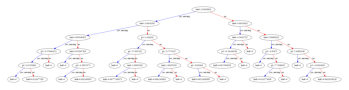

In [18]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
          'max_depth': 5, 'alpha': 10}

# Visualize boosting trees and feature importance

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [300, 60]
plt.show()

## LightGBM

In [19]:
from lightgbm import LGBMClassifier

In [29]:
#%%timeit
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)

# accuracy
lgbm_accuracy = accuracy_score(y_true=y_test, y_pred=pred_lgbm)
print("Accuracy: %.2f%%" % (lgbm_accuracy * 100.0))
print('Accuracy: {}'.format(round(lgbm_accuracy*100), 2))

# precision
lgbm_precision = precision_score(y_true=y_test, y_pred=pred_lgbm, pos_label=1)
print('Precision: {}'.format(round(lgbm_precision*100), 2))

# recall
lgbm_recall = recall_score(y_true=y_test, y_pred=pred_lgbm, pos_label=1)
print('Recall: {}'.format(round(lgbm_recall*100), 2))

# f1 score
lgbm_f1 = f1_score(y_true=y_test, y_pred=pred_lgbm, pos_label=1)
print('F1: {}'.format(round(lgbm_f1*100), 2))

Accuracy: 93.95%
Accuracy: 94
Precision: 93
Recall: 90
F1: 91


## Extra Trees Classifier

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [32]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()